In [5]:
import pandas as pd
import os

data_path = os.path.join('data', 'library_learning')
graph_index = 0 
video_transcripts_df = pd.read_csv(os.path.join(data_path, 'video_transcripts_with_hierarchy_1701550479.csv'))
json_graph = video_transcripts_df['activity_concept_hierarchy'][graph_index]

In [6]:
json_graph

"{'lesson': [{'activity': 'definition', 'primary_concept': 'eigenvalues and eigenvectors', 'supporting_concepts': ['matrix', 'scalar'], 'activities': [{'activity': 'visualization', 'primary_concept': 'eigenvalues and eigenvectors', 'supporting_concepts': ['vector', 'scalar multiplication'], 'activities': []}]}, {'activity': 'example', 'primary_concept': 'eigenvectors', 'supporting_concepts': ['matrix', 'scalar multiplication'], 'activities': []}, {'activity': 'example', 'primary_concept': 'eigenvalues', 'supporting_concepts': ['matrix', 'scalar multiplication'], 'activities': []}, {'activity': 'application', 'primary_concept': 'eigenvalues and eigenvectors', 'supporting_concepts': ['linear algebra', 'matrix transformation'], 'activities': []}, {'activity': 'additional resources', 'primary_concept': 'eigenvalues and eigenvectors', 'supporting_concepts': ['eigen spaces', 'linear algebra textbooks'], 'activities': []}]}"

In [7]:
json_graph.replace("'", "\"")

'{"lesson": [{"activity": "definition", "primary_concept": "eigenvalues and eigenvectors", "supporting_concepts": ["matrix", "scalar"], "activities": [{"activity": "visualization", "primary_concept": "eigenvalues and eigenvectors", "supporting_concepts": ["vector", "scalar multiplication"], "activities": []}]}, {"activity": "example", "primary_concept": "eigenvectors", "supporting_concepts": ["matrix", "scalar multiplication"], "activities": []}, {"activity": "example", "primary_concept": "eigenvalues", "supporting_concepts": ["matrix", "scalar multiplication"], "activities": []}, {"activity": "application", "primary_concept": "eigenvalues and eigenvectors", "supporting_concepts": ["linear algebra", "matrix transformation"], "activities": []}, {"activity": "additional resources", "primary_concept": "eigenvalues and eigenvectors", "supporting_concepts": ["eigen spaces", "linear algebra textbooks"], "activities": []}]}'

In [8]:
import json
graph_dict = json.loads(json_graph.replace("'", "\""))

In [9]:
graph_dict

{'lesson': [{'activity': 'definition',
   'primary_concept': 'eigenvalues and eigenvectors',
   'supporting_concepts': ['matrix', 'scalar'],
   'activities': [{'activity': 'visualization',
     'primary_concept': 'eigenvalues and eigenvectors',
     'supporting_concepts': ['vector', 'scalar multiplication'],
     'activities': []}]},
  {'activity': 'example',
   'primary_concept': 'eigenvectors',
   'supporting_concepts': ['matrix', 'scalar multiplication'],
   'activities': []},
  {'activity': 'example',
   'primary_concept': 'eigenvalues',
   'supporting_concepts': ['matrix', 'scalar multiplication'],
   'activities': []},
  {'activity': 'application',
   'primary_concept': 'eigenvalues and eigenvectors',
   'supporting_concepts': ['linear algebra', 'matrix transformation'],
   'activities': []},
  {'activity': 'additional resources',
   'primary_concept': 'eigenvalues and eigenvectors',
   'supporting_concepts': ['eigen spaces', 'linear algebra textbooks'],
   'activities': []}]}

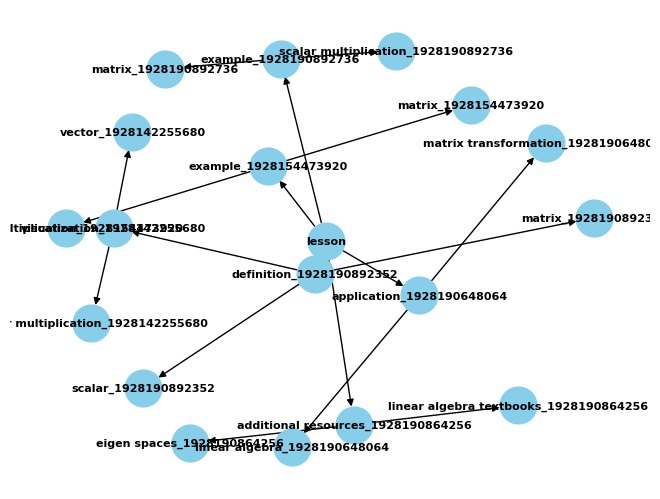

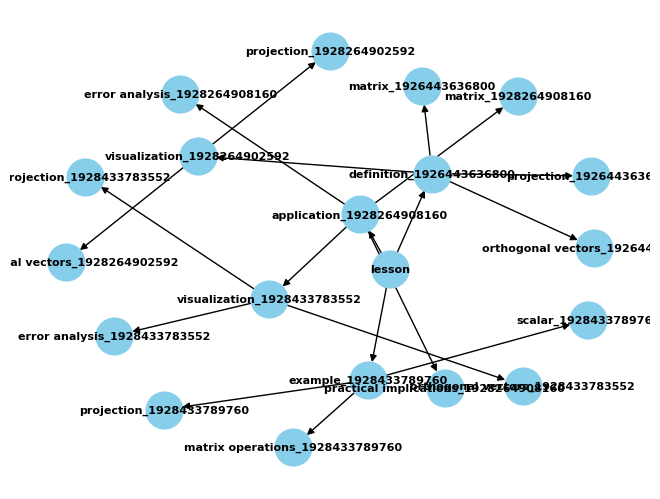

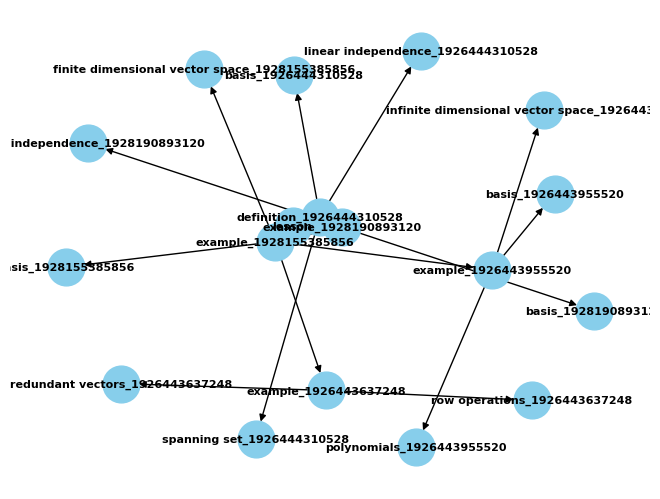

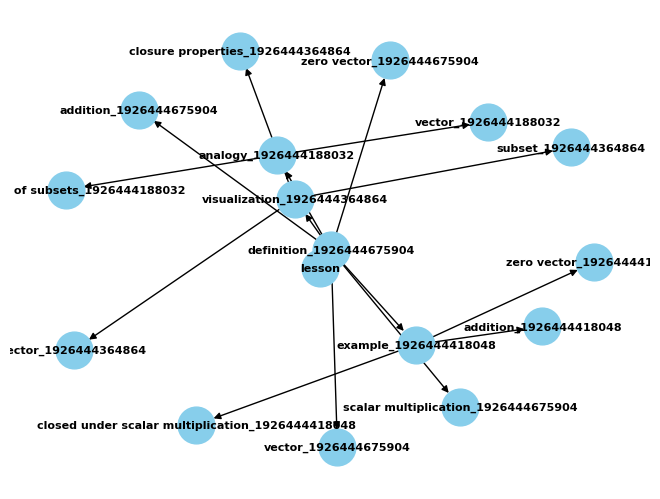

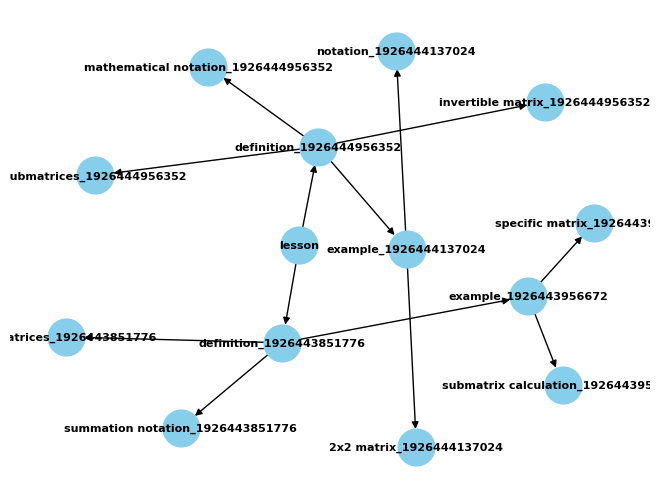

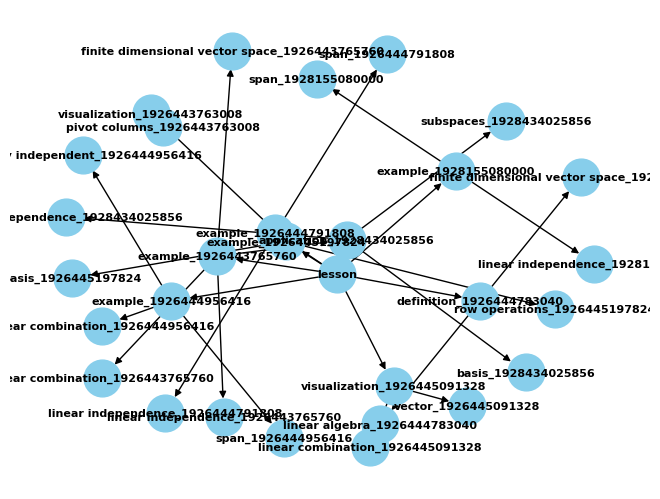

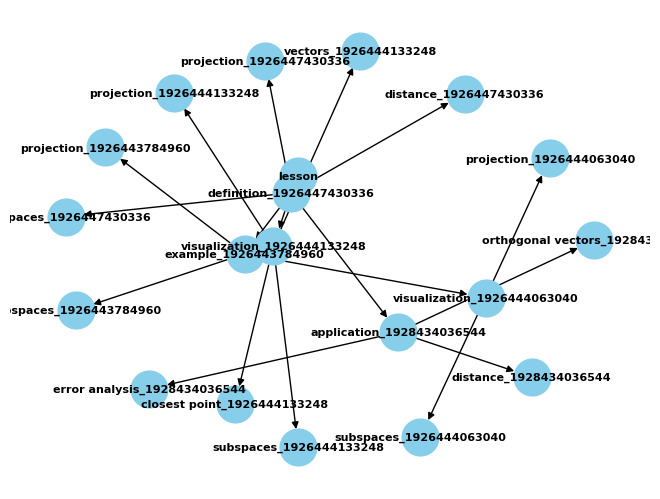

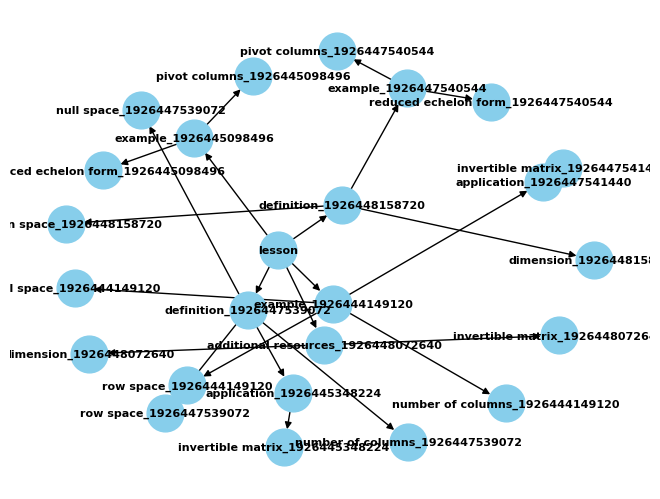

NameError: name 'np' is not defined

In [13]:
import pandas as pd
import networkx as nx
import os
import matplotlib.pyplot as plt
video_transcripts_df = pd.read_csv(os.path.join(data_path, 'video_transcripts_with_hierarchy_1701550479.csv'))
max_size = 0
# for graph_index in range(372):
for graph_index in range(10):
    json_graph = video_transcripts_df['activity_concept_hierarchy'][graph_index]
    try:
        graph_dict = json.loads(json_graph.replace("'", "\""))
        json_graph = graph_dict
    except:
        adjacency_matrix = np.random.randint(0, 2, (30, 30))
        continue
    # json_graph = json.load(open(os.path.join(data_path, "video_transcripts_with_hierarchy_1701550479.csv")))
    # print("THIS IS THE JSON GRAPH", json_graph)
    def add_nodes_edges(graph, node, parent=None):
        # Assign a unique identifier to each node using id(node)
        # node_num = np.random.randint(1000, 9999)
        node_id = f"{node['activity']}_{id(node)}"
        # node_id = f"{node['activity']}_{node_num}"
        
        # Add the current node to the graph
        if parent: graph.add_edge(parent, node_id)
        graph.add_node(node_id, primary_concept=node["primary_concept"])
    
        # If there are supporting concepts, add them as leaf nodes
        for supporting_concept in node.get("supporting_concepts", []):
            supporting_id = f"{supporting_concept}_{id(node)}"
            # supporting_id = f"{supporting_concept}_{node_num}"
            graph.add_node(supporting_id, primary_concept=supporting_concept)
            graph.add_edge(node_id, supporting_id)
    
        # If there are activities, recursively add them as sub-trees
        for activity in node.get("activities", []):
            activity_id = f"{activity['activity']}_{id(activity)}"
            # activity_num = np.random.randint(1000, 9999)
            # activity_id = f"{activity['activity']}_{activity_num}"
            graph.add_edge(node_id, activity_id)
            add_nodes_edges(graph, activity, parent=node_id)
    
    # Create a directed graph
    G = nx.DiGraph()
    # Add root node
    root_node_id = "lesson"
    root_primary_concept = "lesson"
    G.add_node(root_node_id, primary_concept=root_primary_concept)
    
    for lesson in json_graph["lesson"]:
        add_nodes_edges(G, lesson, parent=root_node_id)
    
    # Visualize the tree structure
    plt.figure()
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)
    plt.show()
    
    # # Convert the graph to an adjacency matrix
    adjacency_matrix = nx.adjacency_matrix(G).toarray()
    # print("Adjacency Matrix:")
    # print(adjacency_matrix)
    # NOTE: Networkx only gives upper triangular matrix, so we add the transpose to get the full adjacency matrix
    # print(adjacency_matrix + adjacency_matrix.T)
    max_size = max(max_size, len(adjacency_matrix))
    # print(len(adjacency_matrix))
# print(max_size)

In [ ]:
# video_transcript -> graph -> nlp_formatted_string
# 90 minutes -> 372 videos

# $ 3.72 0.10 per prompt / graph
# $ 11.40 ~ 5 hours
# 1212 
# Compromise between data availability and time and complexity

In [48]:
max_size

40

In [23]:
len(video_transcripts_df['activity_concept_hierarchy'])

372

In [1]:
# 150 epochs -> 2123 seconds = 35 MIN
# SQDIST INSTEAD OF DIST
# 300 epochs -> 3886 seconds = 65 MIN
# 300 EPOCHS!!
import numpy as np
    # seed_num = np.random.randint(1000, 10000)
seed_num = 7777
! python train_graph_iteration.py \
    --task lp \
    --act None \
    --dataset library_learning\
    --model HyboNet \
    --threshold 0.3598 \
    --lr 0.025 \
    --dim 3 \
    --num-layers 2 \
    --bias 1 \
    --dropout 0.25 \
    --weight-decay 1e-3 \
    --manifold Lorentz \
    --log-freq 5 \
    --cuda -1 \
    --patience 500 \
    --grad-clip 0.1 \
    --seed {seed_num} \
    --save 1


INFO:root:Using: cpu
INFO:root:Using seed 7777.
INFO:root:Use Super Node : False
INFO:root:Use Batch Learning : True
INFO:root:Use Margin Loss : True
INFO:root:Use CT + Myelination : False
INFO:root:Step Size for Reduction Factor (Gamma) for learning rate : None
INFO:root:Reduction Factor (Gamma) for learning rate : 0.5
INFO:root:Using Only 1st 372 Subjects
INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 22 word types from a corpus of 73 raw words and 1 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 22 unique words (100.00% of original 22, drops 0)', 'datetime': '2023-12-14T03:20:54.006204', 'gensim': '4.3.2', 'python': '3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)]', 'platform': 'Windows-11-10.0.22621-SP